# Base Model

In [1]:
# imports
import pandas as pd
import numpy as np
from tqdm import tqdm

from sklearn.preprocessing import MultiLabelBinarizer
from skmultilearn.model_selection import IterativeStratification
from sklearn.multiclass import OneVsRestClassifier
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/all_movies_rated_only_cleaned_02.csv')

In [3]:
df.head()

,Genre,Title,Year_produced,Certificate,Ratings,Description,Actors,Actor_1,Actor_2,Actor_3,Actor_4,Description_length,Description_word_count,labels
0,Comedy,Beef,(2023– ),TV-MA,8.2,Two people let a road rage incident burrow int...,"['Steven Yeun', 'Ali Wong', 'Joseph Lee', 'You...",Steven Yeun,Ali Wong,Joseph Lee,Young Mazino,110,19,1
1,Comedy,Succession,(2018–2023),TV-MA,8.8,The Roy family is known for controlling the bi...,"['Nicholas Braun', 'Brian Cox', 'Kieran Culkin...",Nicholas Braun,Brian Cox,Kieran Culkin,Peter Friedman,173,28,1
2,Comedy,The Super Mario Bros. Movie,(2023),PG,7.3,The story of The Super Mario Bros. on their jo...,"['Chris Pratt', 'Anya Taylor-Joy', 'Charlie Da...",Chris Pratt,Anya Taylor-Joy,Charlie Day,Jack Black,81,14,1
3,Comedy,Ted Lasso,(2020– ),TV-MA,8.8,American college football coach Ted Lasso head...,"['Jason Sudeikis', 'Brett Goldstein', 'Hannah ...",Jason Sudeikis,Brett Goldstein,Hannah Waddingham,Brendan Hunt,132,20,1
4,Comedy,Ghosted,(2023),13+,5.8,Cole falls head over heels for enigmatic Sadie...,"['Chris Evans', 'Ana de Armas', 'Adrien Brody'...",Chris Evans,Ana de Armas,Adrien Brody,Mike Moh,232,41,0


In [4]:
df.shape

(190248, 14)

## Data Preprocessing

## Drop unnecessary columns

Strategy:
1. Drop website, actors, ratings and Id

In [5]:
df.drop(columns = ['Actors'], inplace = True)

In [6]:
df.head()

,Genre,Title,Year_produced,Certificate,Ratings,Description,Actor_1,Actor_2,Actor_3,Actor_4,Description_length,Description_word_count,labels
0,Comedy,Beef,(2023– ),TV-MA,8.2,Two people let a road rage incident burrow int...,Steven Yeun,Ali Wong,Joseph Lee,Young Mazino,110,19,1
1,Comedy,Succession,(2018–2023),TV-MA,8.8,The Roy family is known for controlling the bi...,Nicholas Braun,Brian Cox,Kieran Culkin,Peter Friedman,173,28,1
2,Comedy,The Super Mario Bros. Movie,(2023),PG,7.3,The story of The Super Mario Bros. on their jo...,Chris Pratt,Anya Taylor-Joy,Charlie Day,Jack Black,81,14,1
3,Comedy,Ted Lasso,(2020– ),TV-MA,8.8,American college football coach Ted Lasso head...,Jason Sudeikis,Brett Goldstein,Hannah Waddingham,Brendan Hunt,132,20,1
4,Comedy,Ghosted,(2023),13+,5.8,Cole falls head over heels for enigmatic Sadie...,Chris Evans,Ana de Armas,Adrien Brody,Mike Moh,232,41,0


In [7]:
df.shape

(190248, 13)

remarks: Columns has been dropped.

In [8]:
df['Description'].fillna('-', inplace=True)
df['Actor_1'].fillna('-', inplace=True)
df['Actor_2'].fillna('-', inplace=True)
df['Actor_3'].fillna('-', inplace=True)
df['Actor_4'].fillna('-', inplace=True)

In [9]:
df['Ratings'] = df['Ratings'].astype(str)

In [10]:
df.columns

Index(['Genre', 'Title', 'Year_produced', 'Certificate', 'Ratings',
       'Description', 'Actor_1', 'Actor_2', 'Actor_3', 'Actor_4',
       'Description_length', 'Description_word_count', 'labels'],
      dtype='object')

In [11]:
X = df.drop(columns = ['Genre','Ratings', 'Year_produced', 'labels', 'Description_length', 'Description_word_count'])

In [12]:
X.head()

,Title,Certificate,Description,Actor_1,Actor_2,Actor_3,Actor_4
0,Beef,TV-MA,Two people let a road rage incident burrow int...,Steven Yeun,Ali Wong,Joseph Lee,Young Mazino
1,Succession,TV-MA,The Roy family is known for controlling the bi...,Nicholas Braun,Brian Cox,Kieran Culkin,Peter Friedman
2,The Super Mario Bros. Movie,PG,The story of The Super Mario Bros. on their jo...,Chris Pratt,Anya Taylor-Joy,Charlie Day,Jack Black
3,Ted Lasso,TV-MA,American college football coach Ted Lasso head...,Jason Sudeikis,Brett Goldstein,Hannah Waddingham,Brendan Hunt
4,Ghosted,13+,Cole falls head over heels for enigmatic Sadie...,Chris Evans,Ana de Armas,Adrien Brody,Mike Moh


In [13]:
stemmer = PorterStemmer(mode=PorterStemmer.NLTK_EXTENSIONS)

In [14]:
new_tokenize_X = pd.DataFrame()
for i in tqdm(range(len(X.columns))):
    tokenize_X = df[X.columns[i]].apply(lambda x: word_tokenize(str(x).lower()))
    stem_X = tokenize_X.apply(lambda tokens: [stemmer.stem(token) for token in tokens])
    new_tokenize_X[X.columns[i]] = stem_X

100%|████████████████████████████████████████████| 7/7 [04:08<00:00, 35.50s/it]


In [15]:
new_tokenize_X.head()

,Title,Certificate,Description,Actor_1,Actor_2,Actor_3,Actor_4
0,[beef],[tv-ma],"[two, peopl, let, a, road, rage, incid, burrow...","[steven, yeun]","[ali, wong]","[joseph, lee]","[young, mazino]"
1,[success],[tv-ma],"[the, roy, famili, is, known, for, control, th...","[nichola, braun]","[brian, cox]","[kieran, culkin]","[peter, friedman]"
2,"[the, super, mario, bros., movi]",[pg],"[the, stori, of, the, super, mario, bros., on,...","[chri, pratt]","[anya, taylor-joy]","[charli, day]","[jack, black]"
3,"[ted, lasso]",[tv-ma],"[american, colleg, footbal, coach, ted, lasso,...","[jason, sudeiki]","[brett, goldstein]","[hannah, waddingham]","[brendan, hunt]"
4,[ghost],[13+],"[cole, fall, head, over, heel, for, enigmat, s...","[chri, evan]","[ana, de, arma]","[adrien, brodi]","[mike, moh]"


In [16]:
%%time
X_df = pd.DataFrame()
for i in range(len(new_tokenize_X.columns)):
    convert_to_string = new_tokenize_X[new_tokenize_X.columns[i]].apply(lambda x: ' '.join(x) if x else '')
    X_df[new_tokenize_X.columns[i]] = convert_to_string

CPU times: total: 500 ms
Wall time: 565 ms


In [17]:
X_df.head()

,Title,Certificate,Description,Actor_1,Actor_2,Actor_3,Actor_4
0,beef,tv-ma,two peopl let a road rage incid burrow into th...,steven yeun,ali wong,joseph lee,young mazino
1,success,tv-ma,the roy famili is known for control the bigges...,nichola braun,brian cox,kieran culkin,peter friedman
2,the super mario bros. movi,pg,the stori of the super mario bros. on their jo...,chri pratt,anya taylor-joy,charli day,jack black
3,ted lasso,tv-ma,american colleg footbal coach ted lasso head t...,jason sudeiki,brett goldstein,hannah waddingham,brendan hunt
4,ghost,13+,"cole fall head over heel for enigmat sadi , bu...",chri evan,ana de arma,adrien brodi,mike moh


In [18]:
X = X_df['Title'] + ' ' + X_df['Certificate'] + ' ' + X_df['Description'] + ' ' + X_df['Actor_1'] + ' ' + X_df['Actor_2'] + ' ' + X_df['Actor_3'] + ' ' + X_df['Actor_4']

Remarks: tokenizing, stemming completed.

In [19]:
y = df['labels']

In [20]:
y.value_counts(normalize=True )

1    0.532915
0    0.467085
Name: labels, dtype: float64

Train Test Split

In [21]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [22]:
X.head()

0    beef tv-ma two peopl let a road rage incid bur...
1    success tv-ma the roy famili is known for cont...
2    the super mario bros. movi pg the stori of the...
3    ted lasso tv-ma american colleg footbal coach ...
4    ghost 13+ cole fall head over heel for enigmat...
dtype: object

In [23]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: labels, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (142686,)
X_test shape: (47562,)
y_train shape: (142686,)
y_test shape: (47562,)


In [26]:
tfidf = TfidfVectorizer(stop_words = 'english')

## Naive Bayes Model

In [41]:
nb = MultinomialNB()

In [54]:
pipe_nb_gs = Pipeline([('tfidf',tfidf),('nb',nb)])

In [58]:
pipe_nb_gs_params = {'nb__alpha':[0.1,0.5]}

In [59]:
nb_gs = GridSearchCV(pipe_nb_gs, pipe_nb_gs_params, cv=5, verbose=1, error_score='raise')

In [60]:
nb_model = nb_gs.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [61]:
pred_test = nb_gs.predict(X_test)

In [62]:
pred_train = nb_gs.predict(X_train)

In [63]:
nb_model.score(X_train,y_train)

0.870344672918156

In [64]:
nb_model.score(X_test,y_test)

0.81428451284639

In [65]:
nb_gs.best_params_

{'nb__alpha': 0.1}

In [66]:
print(classification_report(y_test, pred_test, target_names=['Bad', 'Good']))

              precision    recall  f1-score   support

         Bad       0.78      0.85      0.81     22119
        Good       0.85      0.79      0.82     25443

    accuracy                           0.81     47562
   macro avg       0.81      0.82      0.81     47562
weighted avg       0.82      0.81      0.81     47562



In [67]:
print(classification_report(y_train, pred_train, target_names=['Bad', 'Good']))

              precision    recall  f1-score   support

         Bad       0.84      0.90      0.87     66743
        Good       0.91      0.84      0.87     75943

    accuracy                           0.87    142686
   macro avg       0.87      0.87      0.87    142686
weighted avg       0.87      0.87      0.87    142686



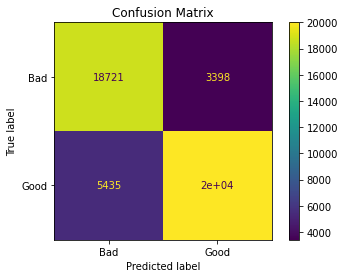

In [68]:
# plot confusion matrix
cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bad', 'Good'])
disp.plot();

plt.title("Confusion Matrix")
plt.show()

# Base Model Discussion

In analyzing the given confusion matrix, it is evident that the model performs well in terms of true positive and true negative predictions. However, the presence of a high number of false positive cases is concerning. False positives occur when the model incorrectly predicts instances as positive when they actually belong to the negative class. This can lead to potential misclassifications and incorrect decisions.

To gain a more comprehensive understanding of the model's performance, accuracy metrics are provided. The training accuracy is 87.0%, indicating that the model correctly predicts around 87% of the cases in the training set. On the other hand, the testing accuracy is 81.4%, which is slightly lower than the training accuracy. This discrepancy of approximately 6% suggests the presence of overfitting, where the model is excessively tailored to the training data and struggles to generalize well to unseen data.

To improve the model's performance, two key areas need to be addressed. First, the high number of false positive cases should be reduced. This can be achieved by adjusting the model's threshold or applying different classification techniques that are more effective in handling false positives. By reducing false positives, the model will be more accurate in identifying instances belonging to the correct class.

Second, the issue of overfitting needs to be addressed. Overfitting occurs when the model becomes too specific to the training data and fails to generalize well to new data.

The aim of model improvement is to reduce presence of overfitting and reducing number of false positive cases.